In [1]:
!pip install nltk
!pip install wordcloud

In [2]:
!pip install seaborn
 # General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [4]:
# read in all our data
data=pd.read_csv('/content/combined - Sheet1.csv')

In [5]:
data.head()

,Date,Close,Volume,Open,High,Low,headlines
0,2/1/2015,$40.72,6903318,$41.07,$41.49,$40.45,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."
1,5/1/2015,$39.94,11605034,$40.07,$40.34,$39.75,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."
2,6/1/2015,$39.62,7643858,$40.17,$40.20,$39.28,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."
3,7/1/2015,$40.59,9670842,$39.88,$40.62,$39.70,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."
4,8/1/2015,$41.25,13146188,$41.17,$41.65,$41.01,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."


In [ ]:
data.tail()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1620 non-null   object
 1   Close      1620 non-null   object
 2   Volume     1620 non-null   int64 
 3   Open       1620 non-null   object
 4   High       1620 non-null   object
 5   Low        1620 non-null   object
 6   headlines  1620 non-null   object
dtypes: int64(1), object(6)
memory usage: 88.7+ KB


In [8]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

Date         0
Close        0
Volume       0
Open         0
High         0
Low          0
headlines    0
dtype: int64

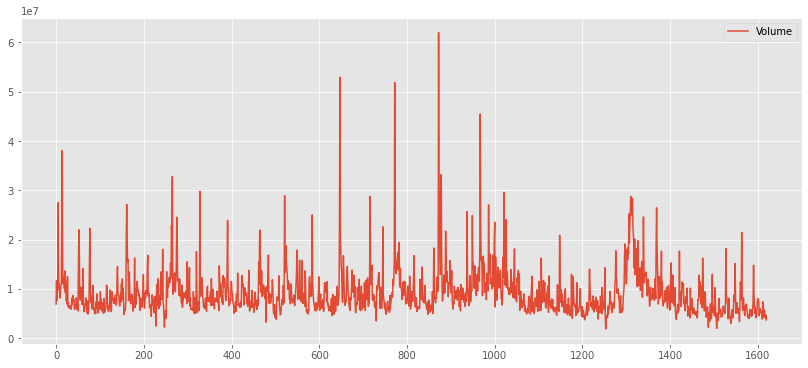

In [9]:
sns.lineplot(data=data)

In [10]:
data['Close']=data['Close'].str.replace('$'," ").astype(float)
data['Open']=data['Open'].str.replace('$'," ").astype(float)
data['High']=data['High'].str.replace('$'," ").astype(float)
data['Low']=data['Low'].str.replace('$'," ").astype(float)
data['Volume']=data['Volume'].astype(float)

In [11]:
data.describe()

,Close,Volume,Open,High,Low
count,1620.000000,1.620000e+03,1620.000000,1620.000000,1620.000000
mean,67.793549,9.111134e+06,67.774932,68.389012,67.145259
std,17.507450,4.761683e+06,17.516612,17.681879,17.336156
min,39.620000,1.847770e+06,39.630000,40.200000,39.280000
25%,55.747500,6.302676e+06,55.750000,56.157500,55.287500
50%,59.275000,7.945730e+06,59.145000,59.680000,58.655000
75%,78.422500,1.054882e+07,78.467500,79.020000,77.397500
max,118.340000,6.201360e+07,118.170000,118.980000,117.040000


In [12]:
data.head()

,Date,Close,Volume,Open,High,Low,headlines
0,2/1/2015,40.72,6903318.0,41.07,41.49,40.45,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."
1,5/1/2015,39.94,11605034.0,40.07,40.34,39.75,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."
2,6/1/2015,39.62,7643858.0,40.17,40.20,39.28,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."
3,7/1/2015,40.59,9670842.0,39.88,40.62,39.70,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."
4,8/1/2015,41.25,13146188.0,41.17,41.65,41.01,"Eyes On Fed After ECB, Other Bank Stimulus Mov..."


Text(0, 0.5, 'price')

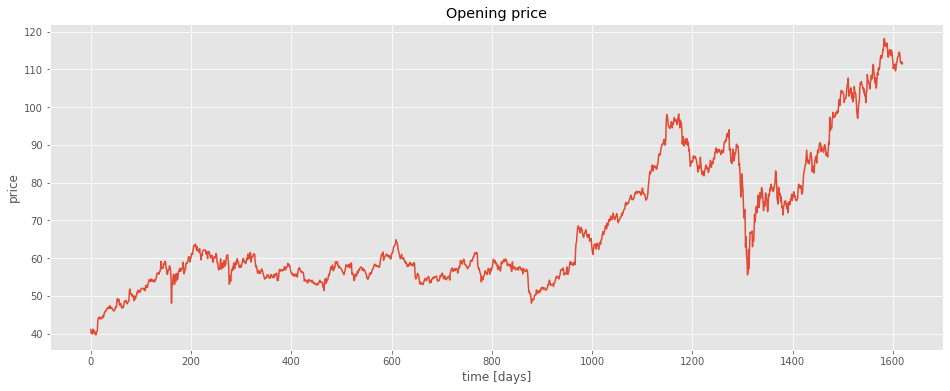

In [13]:
data['Open'].plot(figsize=(16,6))
plt.title('Opening price')
plt.xlabel('time [days]')
plt.ylabel('price')

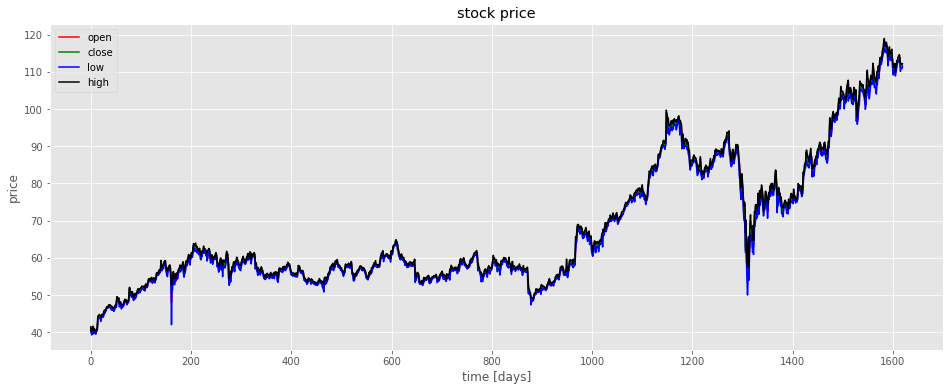

In [14]:
plt.figure(figsize=(16,6));
plt.plot(data.Open.values, color='red', label='open')
plt.plot(data['Close'].values, color='green', label='close')
plt.plot(data.Low.values, color='blue', label='low')
plt.plot(data.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

In [15]:
#7 day rolling mean
data.rolling(7).mean().head(15)

,Close,Volume,Open,High,Low
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,40.305714,1.232807e+07,40.430000,40.782857,39.951429
7,40.265714,1.291797e+07,40.382857,40.722857,39.897143
8,40.304286,1.258736e+07,40.377143,40.730000,39.905714
9,40.328571,1.265482e+07,40.395714,40.765714,39.951429


Text(0, 0.5, 'price')

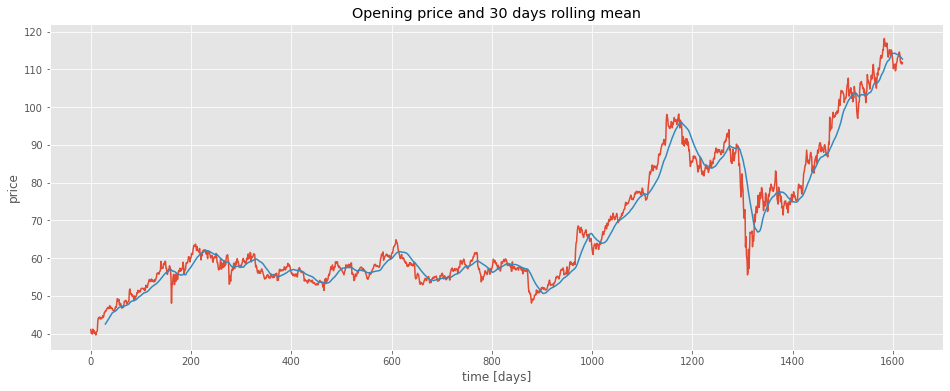

In [16]:
 data['Open'].plot(figsize=(16,6))
 data.rolling(window=30).mean()['Open'].plot()
 plt.title('Opening price and 30 days rolling mean')
plt.xlabel('time [days]')
plt.ylabel('price')

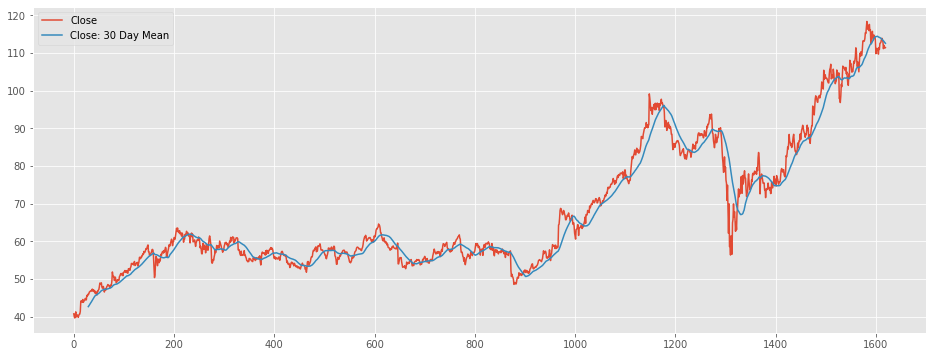

In [17]:
data['Close: 30 Day Mean']= data['Close'].rolling(window=30).mean()
data[['Close', 'Close: 30 Day Mean']].plot(figsize=(16,6))

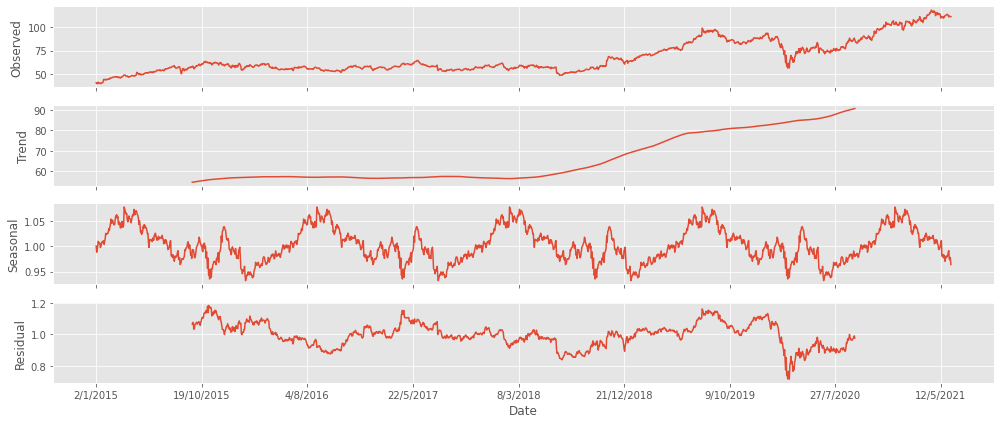

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
# grab just Date and closing value columns
temp = data[['Date', 'Close']]
# need to set the date as the index for the seasonal_decompose function to work properly
temp = temp.set_index('Date')
# apply seasonal_decomposition function
decomp = seasonal_decompose(temp, model='multiplicative', freq=365).plot();



In [19]:
#Data Cleaning
data.isna().any()

Date                  False
Close                 False
Volume                False
Open                  False
High                  False
Low                   False
headlines             False
Close: 30 Day Mean     True
dtype: bool

In [20]:
training_set=data['Open']
training_set=pd.DataFrame(training_set)

In [21]:
#feature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range = (0,1))
training_set_scaled=sc.fit_transform(training_set)

In [22]:

import spacy
from spacy.matcher import PhraseMatcher
try:
 # for i in range(0,156):
  #  text = df['Headlines'][i]
    #nlp = spacy.load("en_core_web_sm")

   # phrase_matcher = PhraseMatcher(nlp.vocab)
    '''phrases = ['Starbucks', 'SBUX']
    patterns = [nlp(text) for text in phrases]
    phrase_matcher.add('SBUX', None, *patterns)'''

    #doc = nlp(text)

    #for sent in doc.sents:
     #   for match_id, start, end in phrase_matcher(nlp(sent.text)):
      #        if nlp.vocab.strings[match_id] in ["SBUX"]:
       #         print(sent.text)
   # df['headline'][i]=sent.text
    nlp = spacy.load("en_core_web_sm")
    text = [_ for _ in data['headlines']]
    phrase_matcher = PhraseMatcher(nlp.vocab)
    phrases = ['Starbucks', 'SBUX']
    patterns = [nlp(text) for text in phrases]
    phrase_matcher.add('SBUX', None, *patterns)


    entities_by_article = []
    for doc in nlp.pipe(text):
      news = []
      for sent in doc.sents:
        for match_id, start, end in phrase_matcher(nlp(sent.text)):
             if nlp.vocab.strings[match_id] in ["SBUX"]:
                print(sent.text)
                news.append(sent.text)
      entities_by_article.append(news)

    data['news'] = pd.Series(entities_by_article)
except KeyError:
 
    print("No Name exist!")

Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again, Starbucks Shows Google And Apple
Once Again

In [23]:
data['headline'] = data.news.apply(lambda x: ', '.join([str(i) for i in x]))
data.head()

,Date,Close,Volume,Open,High,Low,headlines,Close: 30 Day Mean,news,headline
0,2/1/2015,40.72,6903318.0,41.07,41.49,40.45,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","Once Again, Starbucks Shows Google And Apple"
1,5/1/2015,39.94,11605034.0,40.07,40.34,39.75,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","Once Again, Starbucks Shows Google And Apple"
2,6/1/2015,39.62,7643858.0,40.17,40.20,39.28,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","Once Again, Starbucks Shows Google And Apple"
3,7/1/2015,40.59,9670842.0,39.88,40.62,39.70,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","Once Again, Starbucks Shows Google And Apple"
4,8/1/2015,41.25,13146188.0,41.17,41.65,41.01,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","Once Again, Starbucks Shows Google And Apple"


In [24]:
data.drop(columns= 'news')

,Date,Close,Volume,Open,High,Low,headlines,Close: 30 Day Mean,headline
0,2/1/2015,40.72,6903318.0,41.07,41.49,40.45,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"Once Again, Starbucks Shows Google And Apple"
1,5/1/2015,39.94,11605034.0,40.07,40.34,39.75,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"Once Again, Starbucks Shows Google And Apple"
2,6/1/2015,39.62,7643858.0,40.17,40.20,39.28,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"Once Again, Starbucks Shows Google And Apple"
3,7/1/2015,40.59,9670842.0,39.88,40.62,39.70,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"Once Again, Starbucks Shows Google And Apple"
4,8/1/2015,41.25,13146188.0,41.17,41.65,41.01,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"Once Again, Starbucks Shows Google And Apple"
...,...,...,...,...,...,...,...,...,...
1615,3/6/2021,111.12,5723894.0,112.01,112.24,110.15,The Epic Battle Over Apple&quot;s App Store 3 ...,113.189667,"Buys NVIDIA Corp, Apple Inc, Starbucks Corp, S..."
1616,4/6/2021,111.99,4477543.0,111.62,112.07,111.05,The Epic Battle Over Apple&quot;s App Store 3 ...,113.058667,"Buys NVIDIA Corp, Apple Inc, Starbucks Corp, S..."
1617,7/6/2021,111.33,4009023.0,111.98,112.28,110.99,The Epic Battle Over Apple&quot;s App Store 3 ...,112.851000,"Buys NVIDIA Corp, Apple Inc, Starbucks Corp, S..."
1618,8/6/2021,111.52,4669852.0,111.38,111.99,110.86,The Epic Battle Over Apple&quot;s App Store 3 ...,112.704333,"Buys NVIDIA Corp, Apple Inc, Starbucks Corp, S..."


In [25]:
data.shape


(1620, 10)

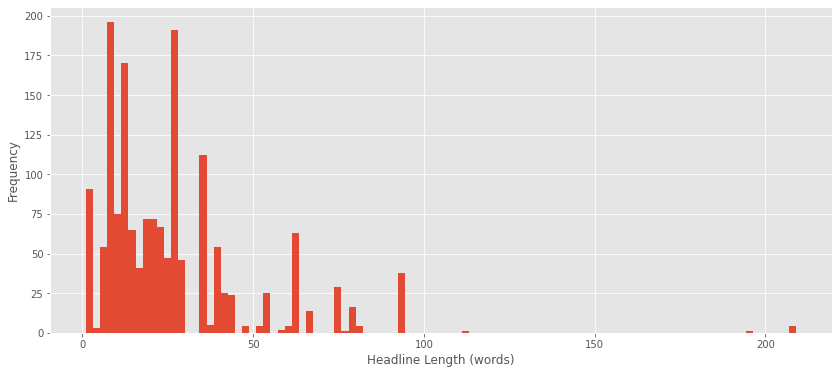

In [26]:
## Getting the number of words by splitting them by a space

words_per_news = data.headline.apply(lambda x: len(x.split(" ")))
words_per_news.hist(bins = 100)
plt.xlabel('Headline Length (words)')
plt.ylabel('Frequency')
plt.show()

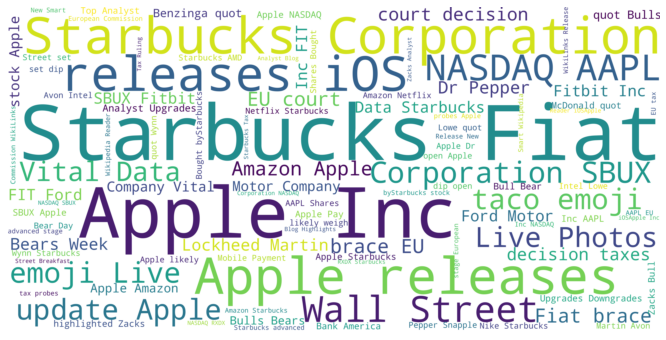

In [27]:
word_cloud_text = ''.join(data['headline'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud,interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

In [28]:
data['headline'] = data['headline'].str.lower()

In [29]:
from nltk import word_tokenize
nltk.download('punkt')
# For reviews not converted to lowe case

token_lists = [word_tokenize(each) for each in data['headline']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# For reviews converted to lowe case
token_lists_lower = [word_tokenize(each) for each in data['headline']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Number of unique tokens then:  1109
Number of unique tokens now:  1109


In [30]:
### Selecting non alpha numeric charactes that are not spaces
spl_chars = data['headline'].apply(lambda review: [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '?',
 '[',
 ']'}

In [31]:
token_lists = [word_tokenize(each) for each in data['headline']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens now:  1109


In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [33]:
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = data['headline'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

data['News_refined'] = data['headline'].apply(lambda row: stopwords_removal(stop_words, row))
data[['headline','News_refined']]

,headline,News_refined
0,"once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]"
1,"once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]"
2,"once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]"
3,"once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]"
4,"once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]"
...,...,...
1615,"buys nvidia corp, apple inc, starbucks corp, s...","[buys, nvidia, corp, ,, apple, inc, ,, starbuc..."
1616,"buys nvidia corp, apple inc, starbucks corp, s...","[buys, nvidia, corp, ,, apple, inc, ,, starbuc..."
1617,"buys nvidia corp, apple inc, starbucks corp, s...","[buys, nvidia, corp, ,, apple, inc, ,, starbuc..."
1618,"buys nvidia corp, apple inc, starbucks corp, s...","[buys, nvidia, corp, ,, apple, inc, ,, starbuc..."


In [35]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [36]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Provide a word to be lemmatized
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


In [37]:
data['News'] = data.News_refined.apply(lambda x: ', '.join([str(i) for i in x]))
data.head()

,Date,Close,Volume,Open,High,Low,headlines,Close: 30 Day Mean,news,headline,News_refined,News
0,2/1/2015,40.72,6903318.0,41.07,41.49,40.45,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple"
1,5/1/2015,39.94,11605034.0,40.07,40.34,39.75,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple"
2,6/1/2015,39.62,7643858.0,40.17,40.20,39.28,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple"
3,7/1/2015,40.59,9670842.0,39.88,40.62,39.70,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple"
4,8/1/2015,41.25,13146188.0,41.17,41.65,41.01,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple"


In [38]:
data.drop(columns=['news','News_refined'])

,Date,Close,Volume,Open,High,Low,headlines,Close: 30 Day Mean,headline,News
0,2/1/2015,40.72,6903318.0,41.07,41.49,40.45,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"once again, starbucks shows google and apple",",, starbucks, shows, google, apple"
1,5/1/2015,39.94,11605034.0,40.07,40.34,39.75,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"once again, starbucks shows google and apple",",, starbucks, shows, google, apple"
2,6/1/2015,39.62,7643858.0,40.17,40.20,39.28,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"once again, starbucks shows google and apple",",, starbucks, shows, google, apple"
3,7/1/2015,40.59,9670842.0,39.88,40.62,39.70,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"once again, starbucks shows google and apple",",, starbucks, shows, google, apple"
4,8/1/2015,41.25,13146188.0,41.17,41.65,41.01,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"once again, starbucks shows google and apple",",, starbucks, shows, google, apple"
...,...,...,...,...,...,...,...,...,...,...
1615,3/6/2021,111.12,5723894.0,112.01,112.24,110.15,The Epic Battle Over Apple&quot;s App Store 3 ...,113.189667,"buys nvidia corp, apple inc, starbucks corp, s...","buys, nvidia, corp, ,, apple, inc, ,, starbuck..."
1616,4/6/2021,111.99,4477543.0,111.62,112.07,111.05,The Epic Battle Over Apple&quot;s App Store 3 ...,113.058667,"buys nvidia corp, apple inc, starbucks corp, s...","buys, nvidia, corp, ,, apple, inc, ,, starbuck..."
1617,7/6/2021,111.33,4009023.0,111.98,112.28,110.99,The Epic Battle Over Apple&quot;s App Store 3 ...,112.851000,"buys nvidia corp, apple inc, starbucks corp, s...","buys, nvidia, corp, ,, apple, inc, ,, starbuck..."
1618,8/6/2021,111.52,4669852.0,111.38,111.99,110.86,The Epic Battle Over Apple&quot;s App Store 3 ...,112.704333,"buys nvidia corp, apple inc, starbucks corp, s...","buys, nvidia, corp, ,, apple, inc, ,, starbuck..."


# Model Building

Sentiment Analysis

The first thing I wanted to do was some sentiment analysis. The textblob package made this extremely easy where I just had to convert the text I wanted to analyze to a TextBlob object and then I was able to obtain information about the sentiment of that blob using using the polarity (i.e. a score of positive or negative) and subjectivity (i.e. a score representing how subjective a statement is) properties:

In [39]:
!pip install ipywidgets

In [40]:
from tqdm import tqdm_notebook

In [41]:
! pip3 install -U textblob

! python3 -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [42]:
from textblob import TextBlob

In [43]:
# create empty lists to hold polarity and subjectivity scores
polarity = list()
subjectivity = list()

# loop through each headlines in the news dataset. Sticking with non-cleaned column because TextBlob is very flexible
for headline in tqdm_notebook(data['News'], desc = "Headlines Processed:"):
    # convert headline to TextBlob object
    blob = TextBlob(headline)
    # Append polarity and subjectivity scores to respective lists
    polarity.append(blob.polarity)
    subjectivity.append(blob.subjectivity)
    
# create polarity and subjectivity columns
data['polarity'] = polarity
data['subjectivity'] = subjectivity


Now I had overall polarity and subjectivity score for each day, I was interested to see the distributions of these overall sentiment scores for each day

Text(0.5, 1.0, 'Headline Polarity Distribution')

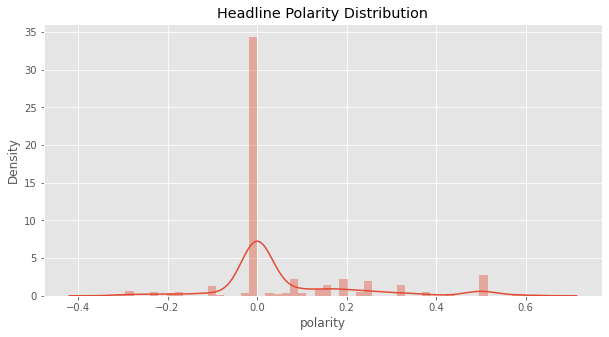

In [44]:
plt.figure(figsize=(10, 5))
sns.distplot(data['polarity'])
plt.title("Headline Polarity Distribution")


Clearly in this plot there are a lot of polarity scores of 0, telling me that my concerns of getting unusable polarity scores weren’t completely unfounded. Even still, there’s still a decent amount of headlines that did receive a polarity score. Something that surprised me was that, if anything, there seems to be more positive polarity than negative. This surprised me because I’m so used to associating news headlines with negativity and bad things happening in the world! Now let's check out the subjectivity distribution

Text(0.5, 1.0, 'Headline Subjectivity Distribution')

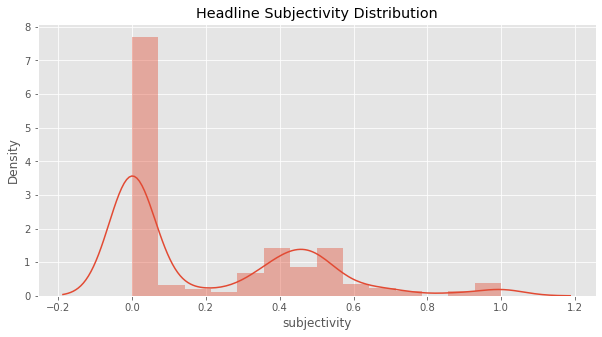

In [45]:
plt.figure(figsize=(10, 5))
sns.distplot(data['subjectivity'])
plt.title("Headline Subjectivity Distribution")

The above subjectivity distribution plot shows a similar pattern to the polarity plot: most headlines have a subjectivity of 0. It’s hard to determine, though, whether or not this is just good journalism as journalists are really supposed to report the facts and not focus so much on opinion or if this is an artifact related to my concerns about high frequency of nouns and such. Either way, I found this to be pretty interesting, especially that, for the most part, those headlines tagged as having some amount of subjectivity fall on the lower side of the spectrum.

In [46]:
data['Adj Close'] = data['Close'].shift(-1)
data['Label'] = data.apply(lambda x: 1 if (x['Adj Close']>= x['Close']) else 0, axis =1)

data[['Date','Adj Close','Close','Label']].head(5)

,Date,Adj Close,Close,Label
0,2/1/2015,39.94,40.72,0
1,5/1/2015,39.62,39.94,0
2,6/1/2015,40.59,39.62,1
3,7/1/2015,41.25,40.59,1
4,8/1/2015,39.90,41.25,0


Text(0.5, 1.0, 'Stock Fall vs Rise Frequencies')

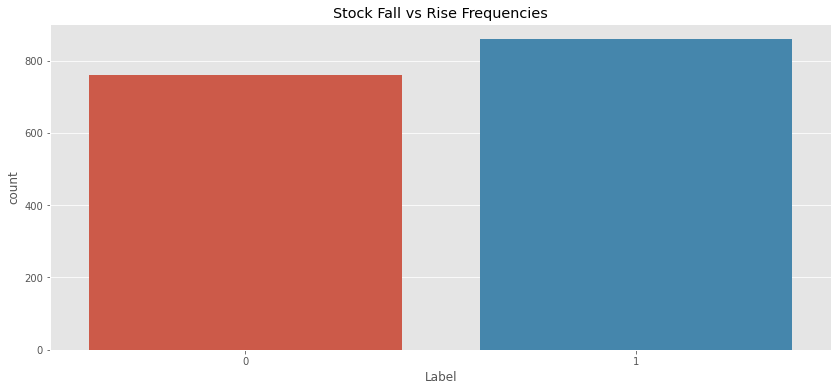

In [47]:
sns.countplot(x = 'Label', data = data)
plt.title("Stock Fall vs Rise Frequencies")

In [48]:
up = len(data[data['Label'] == 1])
down = len(data[data['Label'] == 0])
print("Percentage of up days is " + str(up / data.shape[0]))
print("Percentage of down days is " + str(down / data.shape[0]))

Percentage of up days is 0.5302469135802469
Percentage of down days is 0.4697530864197531


Awesome there isn't really that huge of a difference between these occurances, so I don't see a need to balance the classes here at all when building my models. Let's now isolate the predictor and outcome variables into a single dataset and then split these into training and testing sets

In [49]:
# adding empty sentiment columns to stock_data for later calculation
data['compound'] = ''
data['negative'] = ''
data['neutral'] = ''
data['positive'] = ''
data.head()

,Date,Close,Volume,Open,High,Low,headlines,Close: 30 Day Mean,news,headline,News_refined,News,polarity,subjectivity,Adj Close,Label,compound,negative,neutral,positive
0,2/1/2015,40.72,6903318.0,41.07,41.49,40.45,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,39.94,0,,,,
1,5/1/2015,39.94,11605034.0,40.07,40.34,39.75,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,39.62,0,,,,
2,6/1/2015,39.62,7643858.0,40.17,40.20,39.28,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,40.59,1,,,,
3,7/1/2015,40.59,9670842.0,39.88,40.62,39.70,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,41.25,1,,,,
4,8/1/2015,41.25,13146188.0,41.17,41.65,41.01,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,39.90,0,,,,


In [50]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
data['compound'] = data['News'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['negative'] = data['News'].apply(lambda x: sid.polarity_scores(x)['neg'])
data['neutral'] = data['News'].apply(lambda x: sid.polarity_scores(x)['neu'])
data['positive'] = data['News'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
data.head()

,Date,Close,Volume,Open,High,Low,headlines,Close: 30 Day Mean,news,headline,News_refined,News,polarity,subjectivity,Adj Close,Label,compound,negative,neutral,positive
0,2/1/2015,40.72,6903318.0,41.07,41.49,40.45,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,39.94,0,0.0,0.0,1.0,0.0
1,5/1/2015,39.94,11605034.0,40.07,40.34,39.75,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,39.62,0,0.0,0.0,1.0,0.0
2,6/1/2015,39.62,7643858.0,40.17,40.20,39.28,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,40.59,1,0.0,0.0,1.0,0.0
3,7/1/2015,40.59,9670842.0,39.88,40.62,39.70,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,41.25,1,0.0,0.0,1.0,0.0
4,8/1/2015,41.25,13146188.0,41.17,41.65,41.01,"Eyes On Fed After ECB, Other Bank Stimulus Mov...",NaN,"[Once Again, Starbucks Shows Google And Apple]","once again, starbucks shows google and apple","[,, starbucks, shows, google, apple]",",, starbucks, shows, google, apple",0.0,0.0,39.90,0,0.0,0.0,1.0,0.0


In [52]:
# dropping the 'headline_text' which is unwanted now
#data.drop(['headline','headlines','News_refined','news'], inplace=True, axis=1)

# rearranging the columns of the whole stock_data
data = data[['Date','Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# set the index name
data.index.name = ""

# displaying the final stock_data
data.head()

,Date,Close,compound,negative,neutral,positive,Open,High,Low,Volume
,,,,,,,,,,
0,2/1/2015,40.72,0.0,0.0,1.0,0.0,41.07,41.49,40.45,6903318.0
1,5/1/2015,39.94,0.0,0.0,1.0,0.0,40.07,40.34,39.75,11605034.0
2,6/1/2015,39.62,0.0,0.0,1.0,0.0,40.17,40.20,39.28,7643858.0
3,7/1/2015,40.59,0.0,0.0,1.0,0.0,39.88,40.62,39.70,9670842.0
4,8/1/2015,41.25,0.0,0.0,1.0,0.0,41.17,41.65,41.01,13146188.0


In [53]:
# writing the prepared stock_data to disk
stock_data = data.to_csv('stock_data.csv')

In [54]:

# displaying the shape i.e. number of rows and columns of stock_data
data.shape

(1620, 10)

In [55]:

# checking for null values
data.isna().any()

Date        False
Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [56]:
# displaying stock_data statistics
data.describe(include='all')

,Date,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,1620,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1.620000e+03
unique,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,67.793549,0.186356,0.030577,0.855975,0.076421,67.774932,68.389012,67.145259,9.111134e+06
std,NaN,17.507450,0.381787,0.082382,0.201101,0.091997,17.516612,17.681879,17.336156,4.761683e+06
min,NaN,39.620000,-0.872000,0.000000,0.000000,0.000000,39.630000,40.200000,39.280000,1.847770e+06
25%,NaN,55.747500,0.000000,0.000000,0.793000,0.000000,55.750000,56.157500,55.287500,6.302676e+06
50%,NaN,59.275000,0.000000,0.000000,0.905000,0.039000,59.145000,59.680000,58.655000,7.945730e+06
75%,NaN,78.422500,0.510600,0.000000,1.000000,0.146000,78.467500,79.020000,77.397500,1.054882e+07


In [57]:
# displaying stock_data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1620 non-null   object 
 1   Close     1620 non-null   float64
 2   compound  1620 non-null   float64
 3   negative  1620 non-null   float64
 4   neutral   1620 non-null   float64
 5   positive  1620 non-null   float64
 6   Open      1620 non-null   float64
 7   High      1620 non-null   float64
 8   Low       1620 non-null   float64
 9   Volume    1620 non-null   float64
dtypes: float64(9), object(1)
memory usage: 126.7+ KB


# LSTM MODEL

# Data Preparation

In [58]:
stock_data = pd.read_csv('stock_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
"(0, 2/1/2015)",40.72,0.0,0.0,1.0,0.0,41.07,41.49,40.45,6903318.0
"(1, 5/1/2015)",39.94,0.0,0.0,1.0,0.0,40.07,40.34,39.75,11605034.0
"(2, 6/1/2015)",39.62,0.0,0.0,1.0,0.0,40.17,40.20,39.28,7643858.0
"(3, 7/1/2015)",40.59,0.0,0.0,1.0,0.0,39.88,40.62,39.70,9670842.0
"(4, 8/1/2015)",41.25,0.0,0.0,1.0,0.0,41.17,41.65,41.01,13146188.0


In [59]:
stock_data.shape

(1620, 9)

In [60]:
stock_data.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [61]:
stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1.620000e+03
mean,67.793549,0.186356,0.030577,0.855975,0.076421,67.774932,68.389012,67.145259,9.111134e+06
std,17.507450,0.381787,0.082382,0.201101,0.091997,17.516612,17.681879,17.336156,4.761683e+06
min,39.620000,-0.872000,0.000000,0.000000,0.000000,39.630000,40.200000,39.280000,1.847770e+06
25%,55.747500,0.000000,0.000000,0.793000,0.000000,55.750000,56.157500,55.287500,6.302676e+06
50%,59.275000,0.000000,0.000000,0.905000,0.039000,59.145000,59.680000,58.655000,7.945730e+06
75%,78.422500,0.510600,0.000000,1.000000,0.146000,78.467500,79.020000,77.397500,1.054882e+07
max,118.340000,0.940300,0.438000,1.000000,0.400000,118.170000,118.980000,117.040000,6.201360e+07


In [62]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1620 entries, (0, '2/1/2015') to (1619, '9/6/2021')
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1620 non-null   float64
 1   compound  1620 non-null   float64
 2   negative  1620 non-null   float64
 3   neutral   1620 non-null   float64
 4   positive  1620 non-null   float64
 5   Open      1620 non-null   float64
 6   High      1620 non-null   float64
 7   Low       1620 non-null   float64
 8   Volume    1620 non-null   float64
dtypes: float64(9)
memory usage: 126.6+ KB


In [63]:
# capturing data to be used for each column
close_price = stock_data.iloc[:,0] #close

# printing close price
print("Close Price:")
close_price

Close Price:


Date
(0, 2/1/2015)        40.72
(1, 5/1/2015)        39.94
(2, 6/1/2015)        39.62
(3, 7/1/2015)        40.59
(4, 8/1/2015)        41.25
                     ...  
(1615, 3/6/2021)    111.12
(1616, 4/6/2021)    111.99
(1617, 7/6/2021)    111.33
(1618, 8/6/2021)    111.52
(1619, 9/6/2021)    111.39
Name: Close, Length: 1620, dtype: float64

In [64]:
# concatenating the captured training data into a dataframe
need_data = pd.concat([close_price], axis=1)

# setting column names of the revised stock data
need_data.columns = ['close_price']  
need_data.tail(20)

,close_price
Date,
"(1600, 12/5/2021)",109.79
"(1601, 13/5/2021)",110.49
"(1602, 14/5/2021)",111.20
"(1603, 17/5/2021)",110.98
"(1604, 18/5/2021)",111.07
"(1605, 19/5/2021)",109.67
"(1606, 20/5/2021)",111.41
"(1607, 21/5/2021)",110.92
"(1608, 24/5/2021)",112.52


In [65]:
# Convert the dataframe to a numpy array
dataset = need_data.values

In [66]:
import math
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1296

# Scaling the Target Variable and the Feature Dataset

Since we are using LSTM to predict stock prices, which is a time series data, it is important to understand that LSTM can be very sensitive to the scale of the data. Right now, if the data is observed, it is present in different scales. Therefore, it is important to re-scale the data so that the range of the dataset is same, for almost all records. Here a feature range of (0,1) is used.

In [67]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.01397358]
 [0.00406504]
 [0.        ]
 ...
 [0.9109502 ]
 [0.91336382]
 [0.9117124 ]]


# Dividing the dataset into Training and Test
Normally for any other dataset train_test_split from sklearn package is used, but for time series data like stock prices which is dependent on date, the dataset is divided into train and test dataset in a different way as shown below. In timeseries data, an observation for a particular date is always dependent on the previous date records.

In [103]:
# Create the training data set

train_data = scaled_data[0:training_data_len , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
past_days = 20
for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i, :])
    y_train.append(train_data[i, 0])
    if i<= past_days:
        print(x_train)
        print(y_train)
        print()

[array([[0.01397358],
       [0.00406504],
       [0.        ],
       [0.01232215],
       [0.0207063 ],
       [0.00355691],
       [0.00635163],
       [0.01041667],
       [0.00749492],
       [0.00215955],
       [0.00876524],
       [0.01257622],
       [0.01308435],
       [0.02223069],
       [0.0570376 ],
       [0.05640244],
       [0.0577998 ],
       [0.05284553],
       [0.06237297],
       [0.0527185 ]])]
[0.055640243902439046]



In [104]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [105]:
# Reshape the data because LSTM model works on three dimensional data and currently we have two dimensional data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.01397358],
        [0.00406504],
        [0.        ],
        ...,
        [0.05284553],
        [0.06237297],
        [0.0527185 ]],

       [[0.00406504],
        [0.        ],
        [0.01232215],
        ...,
        [0.06237297],
        [0.0527185 ],
        [0.05564024]],

       [[0.        ],
        [0.01232215],
        [0.0207063 ],
        ...,
        [0.0527185 ],
        [0.05564024],
        [0.05881606]],

       ...,

       [[0.66577744],
        [0.62385671],
        [0.62220528],
        ...,
        [0.64176829],
        [0.62220528],
        [0.60645325]],

       [[0.62385671],
        [0.62220528],
        [0.59832317],
        ...,
        [0.62220528],
        [0.60645325],
        [0.57037602]],

       [[0.62220528],
        [0.59832317],
        [0.58714431],
        ...,
        [0.60645325],
        [0.57037602],
        [0.54077744]]])

In [106]:
print(x_train.shape)
print(y_train.shape)

(1276, 20, 1)
(1276,)


# Stock Data Modelling

In [107]:
# Build the LSTM model
#np.random.seed(2016)
import keras.models
import tensorflow as tf
tf.random.set_seed(0)
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential
# setting the model architecture
model = Sequential()
model.add(LSTM(160, return_sequences=True, activation = "tanh", input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences= False, activation = "tanh"))
model.add(Dense(60))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 20, 160)           103680    
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 160)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 80)                77120     
_________________________________________________________________
dense_8 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 61        
Total params: 185,721
Trainable params: 185,721
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [109]:
# Train the model
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1,patience = 5)
#batch size is the total number of training cells present in the single batch. Epoc is the number of iterations we want
history = model.fit(x_train, y_train, batch_size = 64, epochs = 100, verbose = 1, validation_split = 0.2, callbacks = [early_stop])

Epoch 1/100
16/16 [==============================] - 6s 138ms/step - loss: 0.0151 - val_loss: 0.0140
Epoch 2/100
16/16 [==============================] - 1s 74ms/step - loss: 0.0015 - val_loss: 0.0205
Epoch 3/100
16/16 [==============================] - 1s 73ms/step - loss: 8.6961e-04 - val_loss: 0.0115
Epoch 4/100
16/16 [==============================] - 1s 74ms/step - loss: 6.3088e-04 - val_loss: 0.0033
Epoch 5/100
16/16 [==============================] - 1s 74ms/step - loss: 4.9954e-04 - val_loss: 0.0015
Epoch 6/100
16/16 [==============================] - 1s 70ms/step - loss: 4.2587e-04 - val_loss: 8.5363e-04
Epoch 7/100
16/16 [==============================] - 1s 72ms/step - loss: 3.8393e-04 - val_loss: 0.0012
Epoch 8/100
16/16 [==============================] - 1s 72ms/step - loss: 4.0180e-04 - val_loss: 0.0013
Epoch 9/100
16/16 [==============================] - 1s 70ms/step - loss: 3.7151e-04 - val_loss: 8.8047e-04
Epoch 10/100
16/16 [==============================] - 1s 71ms/s

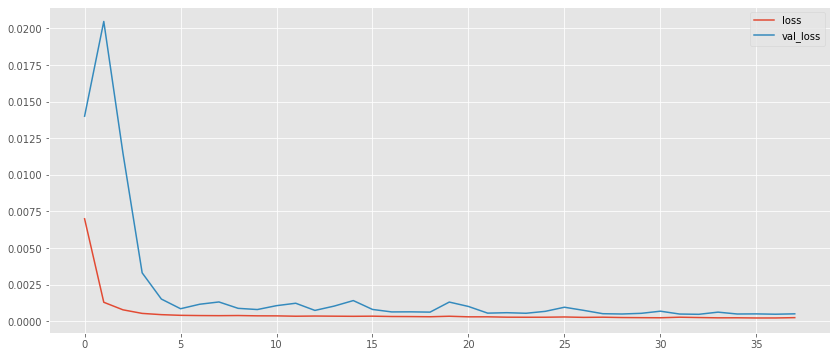

In [95]:

# Plotting loss
loss = pd.DataFrame(model.history.history)
loss.plot()

In [110]:
# Create the testing data set
test_data = scaled_data[training_data_len - past_days: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, :])

In [111]:
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#this bsiacally means that predictions variable contains values of y_test
predictions

array([[ 83.51841 ],
       [ 81.30725 ],
       [ 79.456   ],
       [ 78.89935 ],
       [ 78.43051 ],
       [ 78.32529 ],
       [ 77.79462 ],
       [ 76.99483 ],
       [ 75.36263 ],
       [ 74.34157 ],
       [ 72.6239  ],
       [ 69.76052 ],
       [ 68.22138 ],
       [ 65.65681 ],
       [ 63.120068],
       [ 60.600983],
       [ 59.428135],
       [ 58.617588],
       [ 57.913513],
       [ 58.812664],
       [ 60.586796],
       [ 63.246357],
       [ 65.26834 ],
       [ 66.81865 ],
       [ 67.44133 ],
       [ 66.85971 ],
       [ 66.1518  ],
       [ 65.13651 ],
       [ 64.98455 ],
       [ 65.46334 ],
       [ 66.74398 ],
       [ 68.65343 ],
       [ 70.13914 ],
       [ 71.52265 ],
       [ 72.3526  ],
       [ 72.90928 ],
       [ 73.84374 ],
       [ 74.491806],
       [ 74.3878  ],
       [ 74.74473 ],
       [ 74.86005 ],
       [ 74.90489 ],
       [ 75.32307 ],
       [ 76.028244],
       [ 76.430786],
       [ 76.58473 ],
       [ 76.016235],
       [ 74.8

In [112]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  0.8237693730107052


# Model Predictions

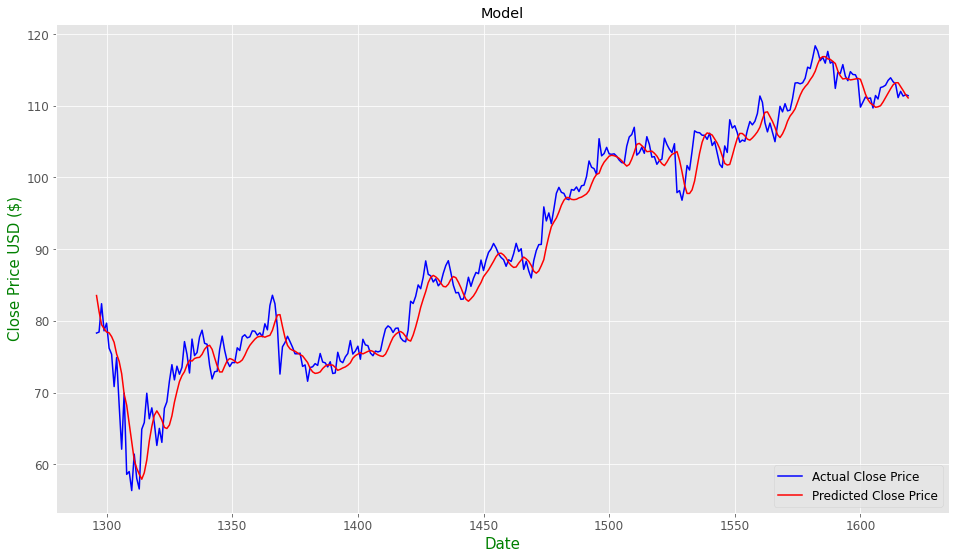

In [90]:
# Plot the data
import copy
valid = copy.deepcopy(data[training_data_len:])
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,9))
plt.title('Model')
plt.xlabel('Date', fontsize= 15, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 15, color = 'g')
plt.plot(valid['Close'], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'],  color = 'red', label = 'Predicted Close Price')
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [91]:
# Show the valid and Predicted Prices
valid

,Date,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Predictions
,,,,,,,,,,,
1296,27/2/2020,78.29,0.1779,0.0,0.939,0.061,78.83,80.87,77.36,17120830.0,83.518410
1297,28/2/2020,78.43,0.7845,0.0,0.734,0.266,76.17,78.81,75.72,19120250.0,81.307251
1298,2/3/2020,82.38,0.7845,0.0,0.734,0.266,77.92,82.41,77.66,14258680.0,79.456001
1299,3/3/2020,78.60,0.7845,0.0,0.734,0.266,82.30,82.62,78.11,12395890.0,78.899353
1300,4/3/2020,79.67,0.7845,0.0,0.734,0.266,79.29,80.20,77.88,10999610.0,78.430511
...,...,...,...,...,...,...,...,...,...,...,...
1615,3/6/2021,111.12,0.0000,0.0,1.000,0.000,112.01,112.24,110.15,5723894.0,113.195572
1616,4/6/2021,111.99,0.0000,0.0,1.000,0.000,111.62,112.07,111.05,4477543.0,112.650703
1617,7/6/2021,111.33,0.0000,0.0,1.000,0.000,111.98,112.28,110.99,4009023.0,112.106422
